# K-means clustering in TensorFlow 2.0

K-means is am unsupervised technique to cluster data into a specified number of clusters.

We will use randonly generated data to demonstrate K-means clustering algorithm
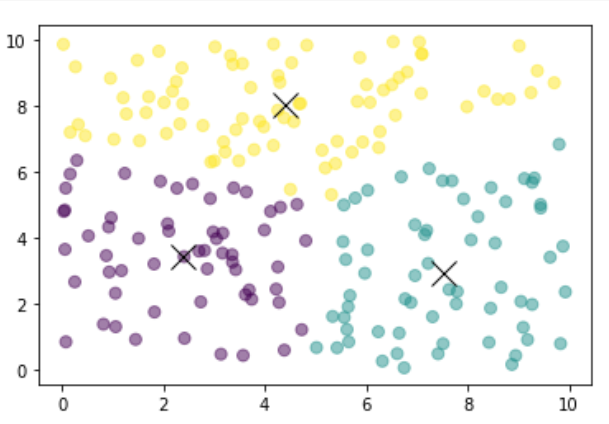

**What we will do:**

1. Create function to generate random 2D points
2. Create a function to select random Centroids
3. Create a function that will create a cluster by assigning points to a nearest centroid
4. Create a function to recalculate (move)centroids so that to minimise sum of distances between points in a clister and their centroid 
5. Create functions that will create a plot to visualise the results
6. Run iterations to cluster the dataset

# Import libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


# Define constants

In [ ]:
points_n = 200
clusters_n = 3
iteration_n = 20
seed = 123
np.random.seed(seed)
tf.random.set_seed(seed)

# Function Declarations

In [ ]:
# generate random 2D datapoints between 0 and 10
def initialize_points():
  points = np.random.uniform(0, 10, (points_n, 2))
  return points

def initialize_centroids(points, k):
  # and get random centroids
  centroids = tf.slice(tf.random.shuffle(points), [0, 0], [clusters_n, -1])
  return centroids

In [ ]:
# closest_centrolids assigns each point to a closest centroid
# it takes points and centroids as parameters 
# for each point it returns an index of the closest centroid 0, 1, ... or clusters_n -1
def closest_centroids(points, centroids):
    # calculate distances between points and centoids
    distances = tf.reduce_sum(tf.square(tf.subtract(points, centroids[:,None])), 2)
    assignments = tf.argmin(distances, 0)
    return assignments


In [ ]:
# move_centroids recalculates position of new centroids as a mean of all points assigned to a centroid
def move_centroids(points, closest, centroids):
    # for each k index of centroid  from 0 to centroids.shape[0] (0 to clusters_n -1)
    # 
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])


In [ ]:
# plots centroids and assigned points
def plot_points_centroids(points, centroids, closest):
  plt.scatter(points[:, 0], points[:, 1], c=closest, s=50, alpha=0.5)
  plt.plot(centroids[:, 0], centroids[:, 1], 'kx', markersize=15)
  plt.show()

# Test Functions

### Test 1. Initialize Points and Centroids

In [ ]:
points = initialize_points()
centroids = initialize_centroids(points, clusters_n)
print(centroids)

tf.Tensor(
[[5.65642001 0.84904163]
 [7.1946897  4.2310646 ]
 [5.13128154 6.6662455 ]], shape=(3, 2), dtype=float64)


#### Visualise data and initial centroids

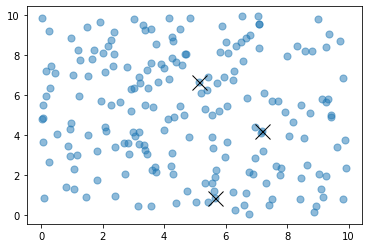

In [ ]:
# scatter graph of points
plt.scatter(points[:, 0], points[:, 1], s=50, alpha=0.5)
# plot randomly selected centroids
plt.plot(centroids[:, 0], centroids[:, 1], 'kx', markersize=15)
#plt.show()

### Test 2. Execute 1 iteration step

#### Test closest_centroids - Assigning points to centroids

tf.Tensor(
[1 2 1 1 1 2 0 2 0 2 2 1 1 0 2 2 2 0 2 1 0 2 1 2 2 2 2 0 2 1 1 2 0 1 2 2 2
 2 0 2 2 1 2 0 2 2 2 2 2 0 2 0 2 1 1 0 2 2 2 2 1 2 2 2 1 0 2 0 0 2 0 1 2 0
 2 2 0 0 2 1 2 0 2 2 1 0 2 0 0 2 0 2 2 2 1 2 2 2 2 0 0 2 1 2 0 1 2 2 0 1 2
 2 0 2 0 0 2 0 2 2 2 1 2 1 2 2 1 2 2 0 0 1 0 0 2 2 2 0 1 0 0 2 2 2 2 2 2 2
 2 2 2 0 2 2 0 2 2 2 2 2 2 1 2 2 2 2 2 0 2 0 2 2 0 0 2 2 0 0 0 1 0 0 2 1 2
 1 2 1 1 1 2 2 0 2 0 2 1 2 2 2], shape=(200,), dtype=int64)


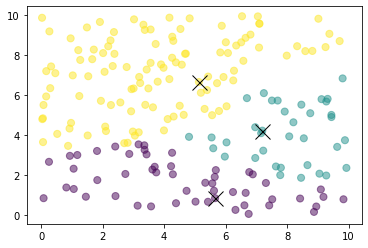

In [ ]:
closest = closest_centroids(points, centroids)
print(closest)
plot_points_centroids(points, centroids, closest)

#### Test move_centroids

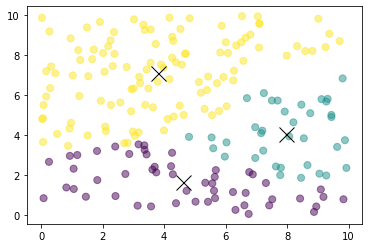

In [ ]:
centroids = move_centroids(points, closest, centroids)
# plot data and centroids
plot_points_centroids(points, centroids, closest)

# Perform iterations

In [ ]:
for step in range(iteration_n):
    # assign points to centroids
    closest = closest_centroids(points, centroids)
    # move centroids
    centroids = move_centroids(points, closest, centroids)    

### Visualize output

In [ ]:
print("centroids", centroids)

centroids [[2.3805468  3.4855907 ]
 [7.52317326 2.97237534]
 [4.38131768 8.07214821]]


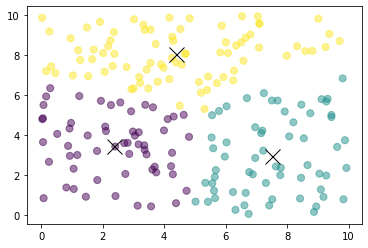

In [ ]:
# plot points and centroids
plot_points_centroids(points, centroids, closest)